# Machine Learning Credit Card Defaults

<p>Data Source:  UC Irvine Machine Learning Repository</p>
<p>Default of credit card clients.  24 features. 30K instances</p>
<p>Customer default payments in Taiwan.</p>

## Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


from mlxtend.plotting import plot_decision_regions

from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Import File

In [5]:
#Read credit card file
#Drop extra row.  Drop column ID
df_cc = pd.read_csv("../sample-notebooks/Credit Card - Data.csv",skiprows=1).drop(['ID'], axis=1)
df_cc

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


## Exploratory Data Analysis (EDA)

In [7]:
#colunms in dataset
df_cc.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [9]:
#dataset information.  column names, non-null, dtype
df_cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [11]:
#number columns & rows in dataset
df_cc.shape

(30000, 24)

In [13]:
#basic statistics on dataset
df_cc.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [15]:
# How many null values
df_cc.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

## Data Visualization

SEX
2    18112
1    11888
Name: count, dtype: int64


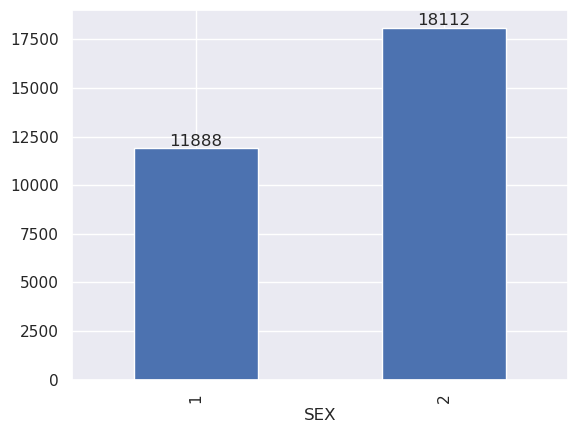

In [17]:
#Distribution of column SEX
#X2: SEX (1 = male; 2 = female).
print(df_cc.SEX.value_counts())
ax=df_cc.SEX.value_counts().sort_values(ascending=True).plot(kind="bar")
ax.bar_label(ax.containers[0])
plt.show()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64


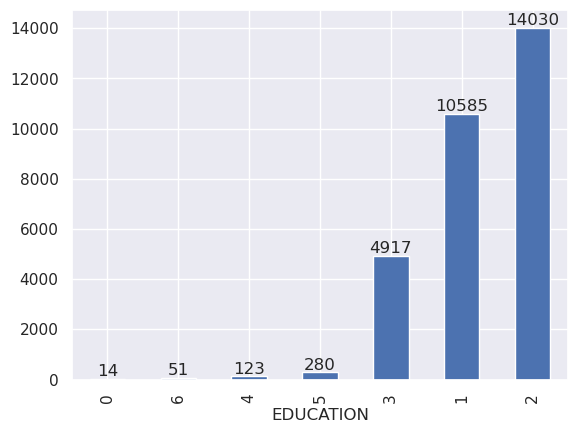

In [19]:
#Distribution of column EDUCATION
#X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)
print(df_cc.EDUCATION.value_counts())
ax=df_cc.EDUCATION.value_counts().sort_values(ascending=True).plot(kind="bar")
ax.bar_label(ax.containers[0])
plt.show()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64


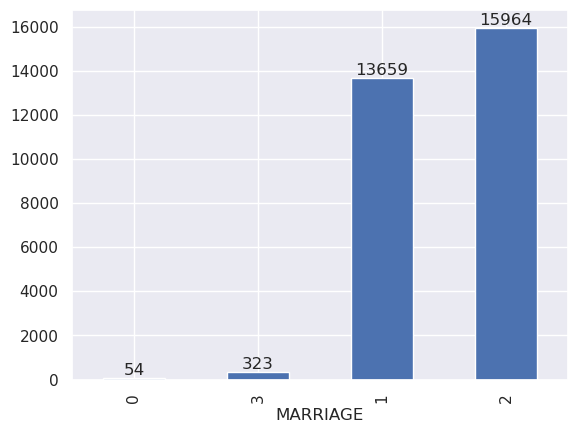

In [21]:
#Distribution of column MARRIAGE
#X4: Marital status (1 = married; 2 = single; 3 = others)
print(df_cc.MARRIAGE.value_counts())
ax=df_cc.MARRIAGE.value_counts().sort_values(ascending=True).plot(kind="bar")
ax.bar_label(ax.containers[0])
plt.show()

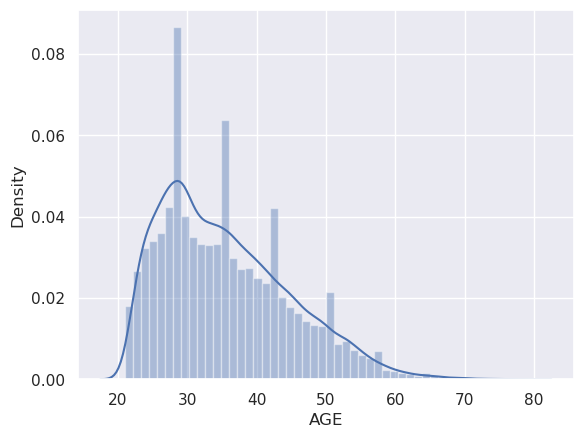

In [23]:
#Distribution of AGE column
sns.distplot(df_cc['AGE'])
plt.show()

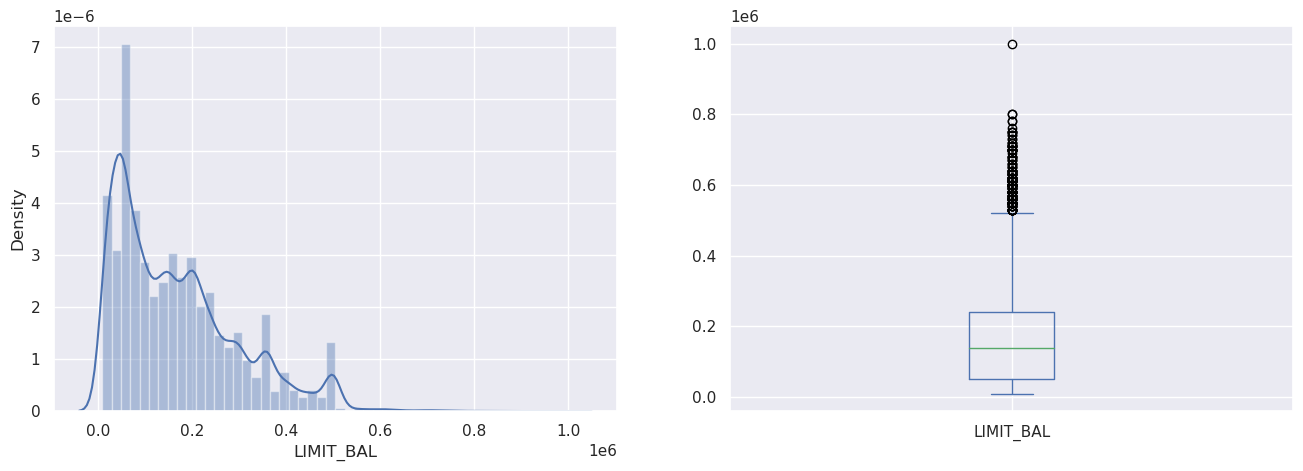

In [25]:
#Distribution of LIMIT_BAL
# Amount of the given credit (NT dollar)
plt.subplot(121), sns.distplot(df_cc['LIMIT_BAL'])
plt.subplot(122), df_cc['LIMIT_BAL'].plot.box(figsize=(16,5))
plt.show()

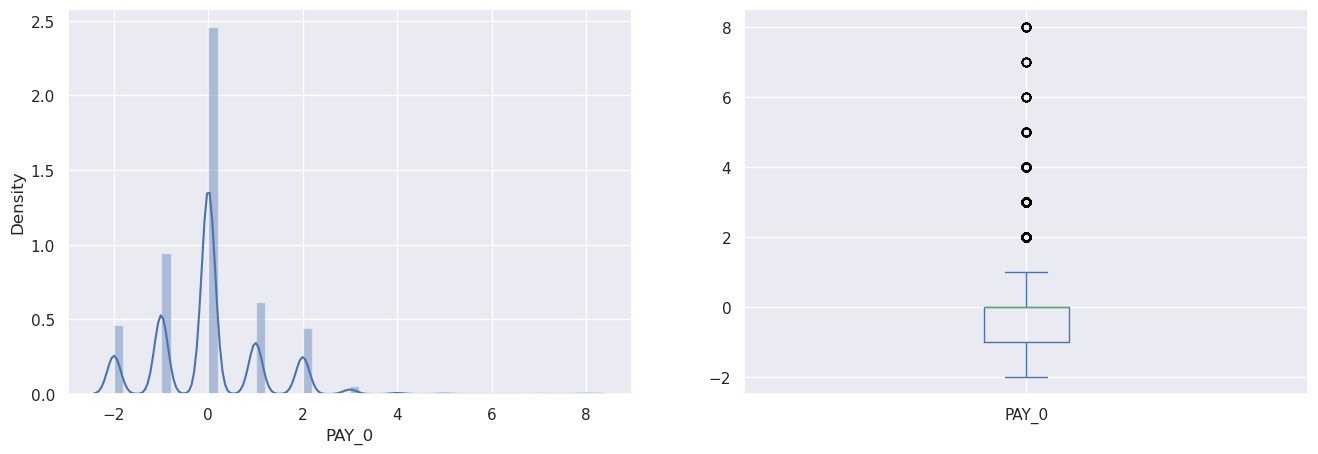

In [27]:
#Distribution PAY_0:  History of Past Payment Timeliness
#The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 
# 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 
# 9 = payment delay for nine months and above.
plt.subplot(121), sns.distplot(df_cc['PAY_0'])
plt.subplot(122), df_cc['PAY_0'].plot.box(figsize=(16,5))
plt.show()

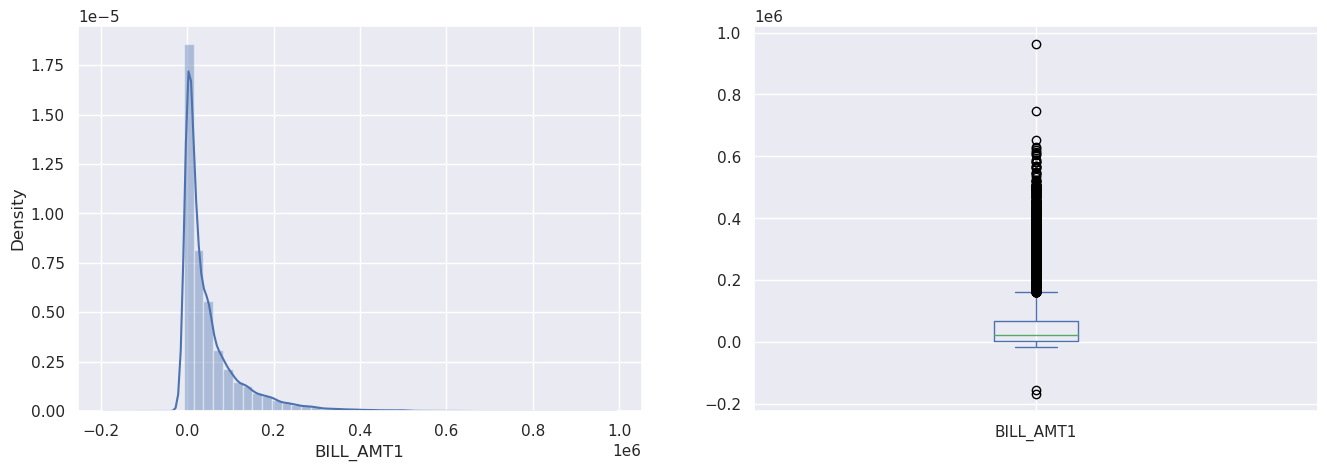

In [29]:
#BILL_AMT1: Amount of bill statement
plt.subplot(121), sns.distplot(df_cc['BILL_AMT1'])
plt.subplot(122), df_cc['BILL_AMT1'].plot.box(figsize=(16,5))
plt.show()

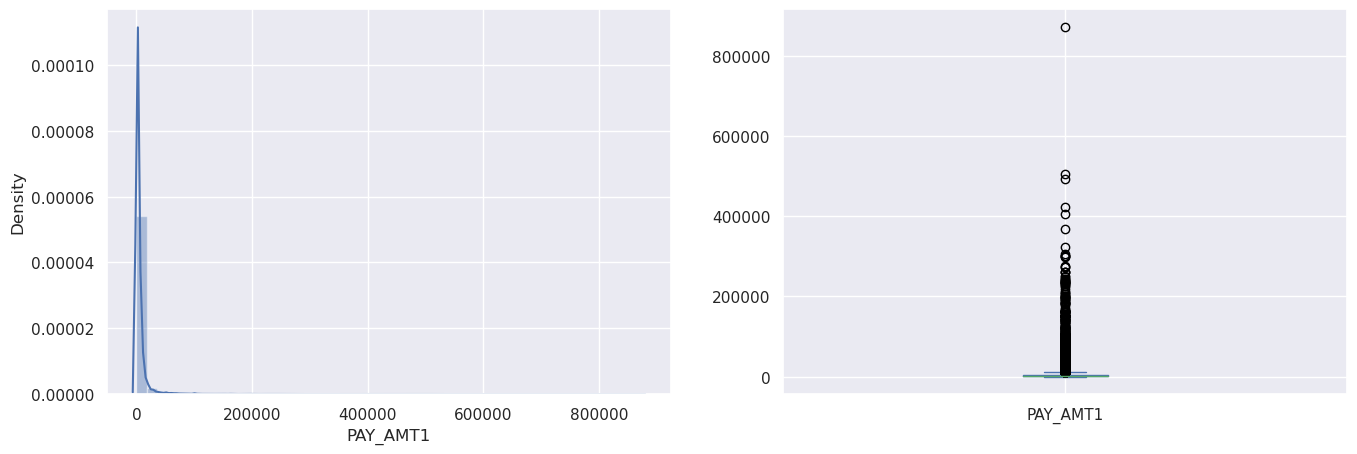

In [31]:
#PAY_AMT1: Amount of previous payment
plt.subplot(121), sns.distplot(df_cc['PAY_AMT1'])
plt.subplot(122), df_cc['PAY_AMT1'].plot.box(figsize=(16,5))
plt.show()

## Data Cleaning

In [33]:
# Create a copy of the dataframe
df_cc_copy = df_cc.copy(deep=True)

### Rename Column

In [35]:
#rename last column
df_cc_copy.rename(columns={'default payment next month':'default'}, inplace = True)
df_cc_copy

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


### Impute missing values
EDUCATION and MARRIAGE should not have 0s.

In [37]:
#Count of Null values after replacing 0's with NaN for EDUCATION & MARRIAGE

df_cc_copy[['EDUCATION', 'MARRIAGE']] = df_cc_copy[['EDUCATION','MARRIAGE']].replace(0,np.NaN)

#show count of NaNs
df_cc_copy.isnull().sum()
           

LIMIT_BAL     0
SEX           0
EDUCATION    14
MARRIAGE     54
AGE           0
PAY_0         0
PAY_2         0
PAY_3         0
PAY_4         0
PAY_5         0
PAY_6         0
BILL_AMT1     0
BILL_AMT2     0
BILL_AMT3     0
BILL_AMT4     0
BILL_AMT5     0
BILL_AMT6     0
PAY_AMT1      0
PAY_AMT2      0
PAY_AMT3      0
PAY_AMT4      0
PAY_AMT5      0
PAY_AMT6      0
default       0
dtype: int64

<Axes: >

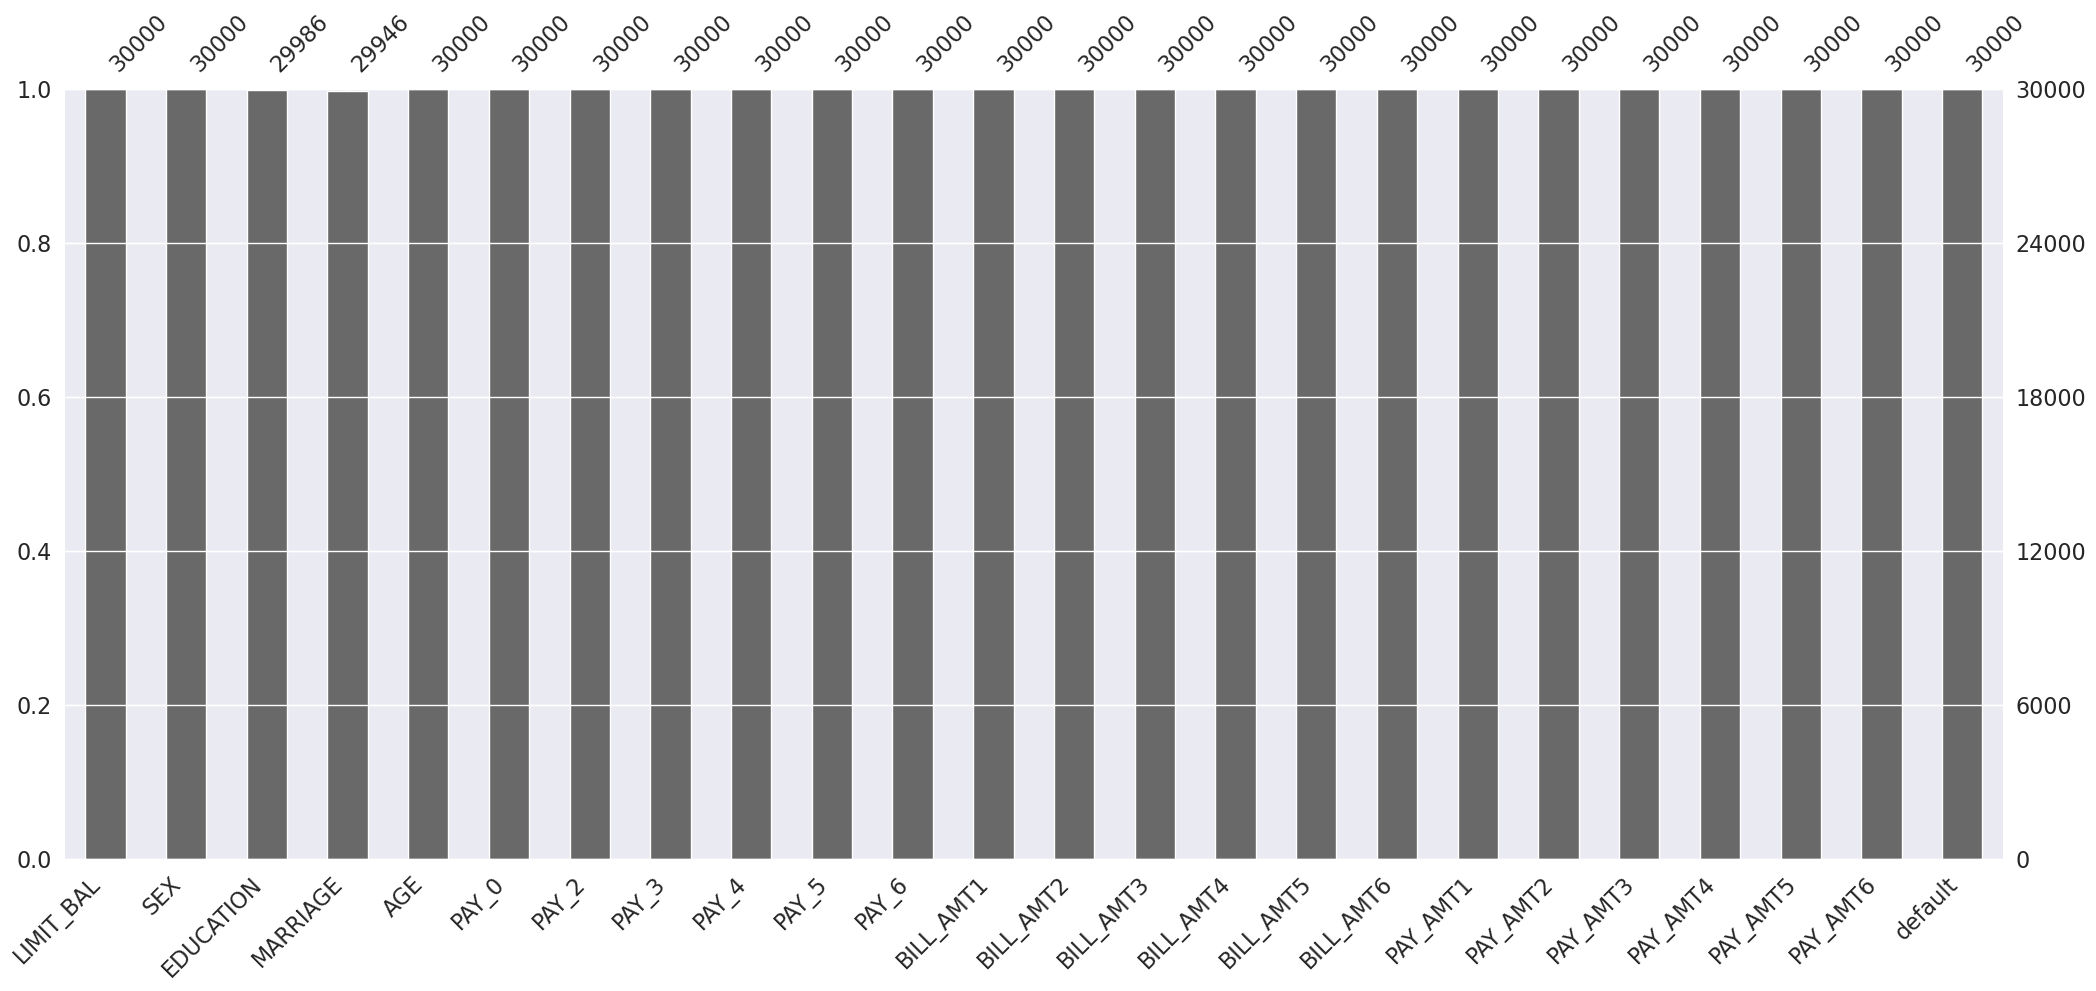

In [39]:
# Plotting Null count analysis
import missingno as msno
msno.bar(df_cc_copy)

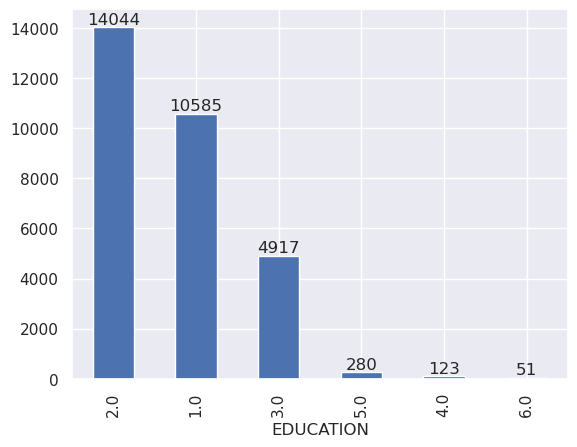

In [41]:
# Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)
# Impute missing with 2 = university.  Average = 1.88

df_cc_copy['EDUCATION'].fillna(2, inplace=True)
ax = df_cc_copy.EDUCATION.value_counts().plot(kind="bar")
ax.bar_label(ax.containers[0])
plt.show()

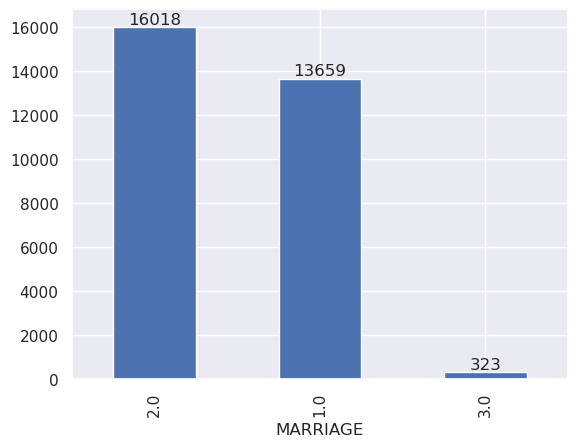

In [43]:
# Marital status (1 = married; 2 = single; 3 = others)
#Impute missing with 2 = Single.  Average = 1.55

df_cc_copy['MARRIAGE'].fillna(2, inplace=True)
ax = df_cc_copy.MARRIAGE.value_counts().plot(kind="bar")
ax.bar_label(ax.containers[0])
plt.show()

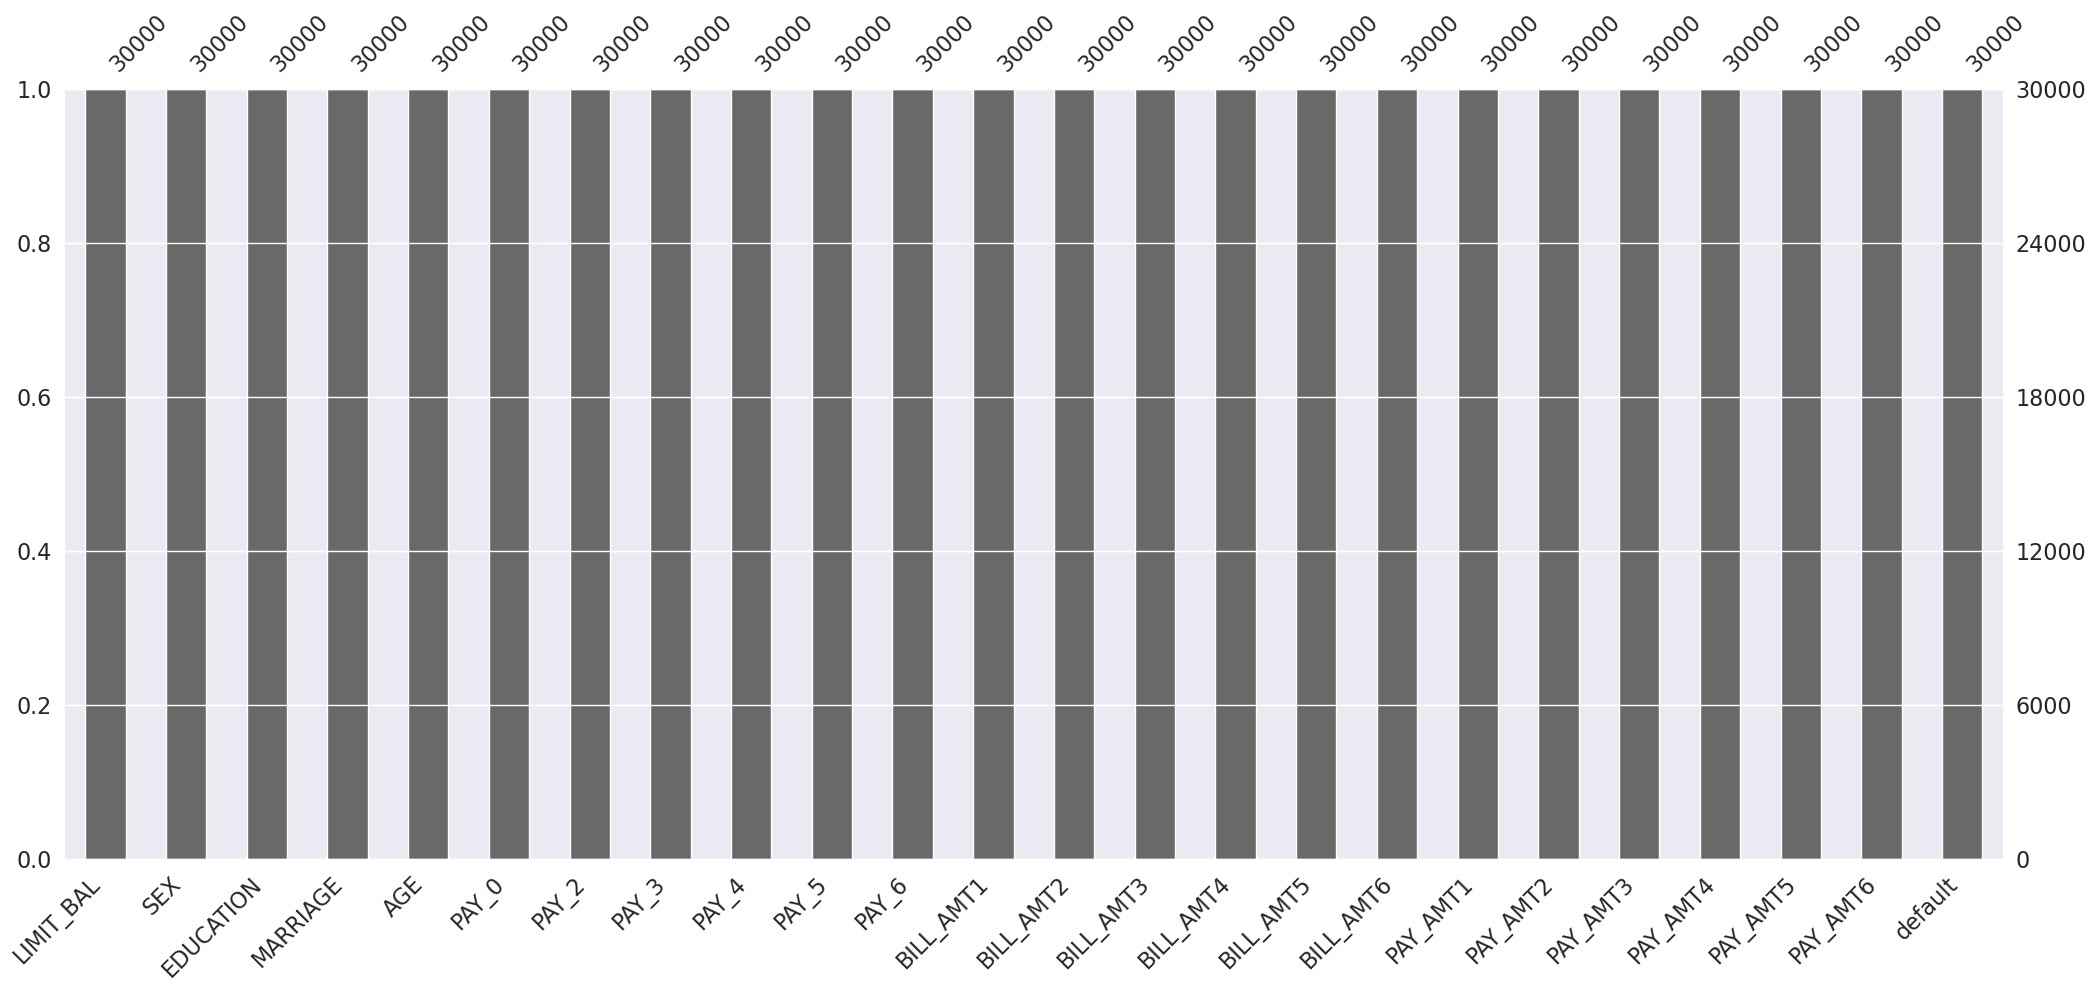

In [45]:
# Plotting Null count analysis after replacing NaN
msno.bar(df_cc_copy)
plt.show()

### Standardize Values

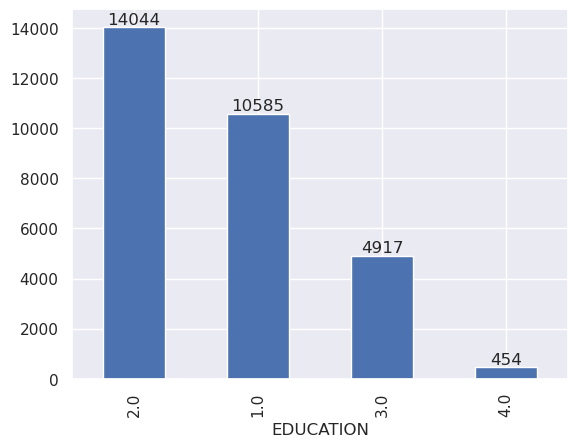

In [47]:
# Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)
# Education should have 4 values. 5 and 6 are not listed as values.  
# Change 5 and 6 to 4.

df_cc_copy.loc[df_cc_copy['EDUCATION']== 5.0, 'EDUCATION'] = 4
df_cc_copy.loc[df_cc_copy['EDUCATION']== 6.0, 'EDUCATION'] = 4 
    
ax = df_cc_copy.EDUCATION.value_counts().plot(kind="bar")
ax.bar_label(ax.containers[0])
plt.show()   



## Correlation Between all the features

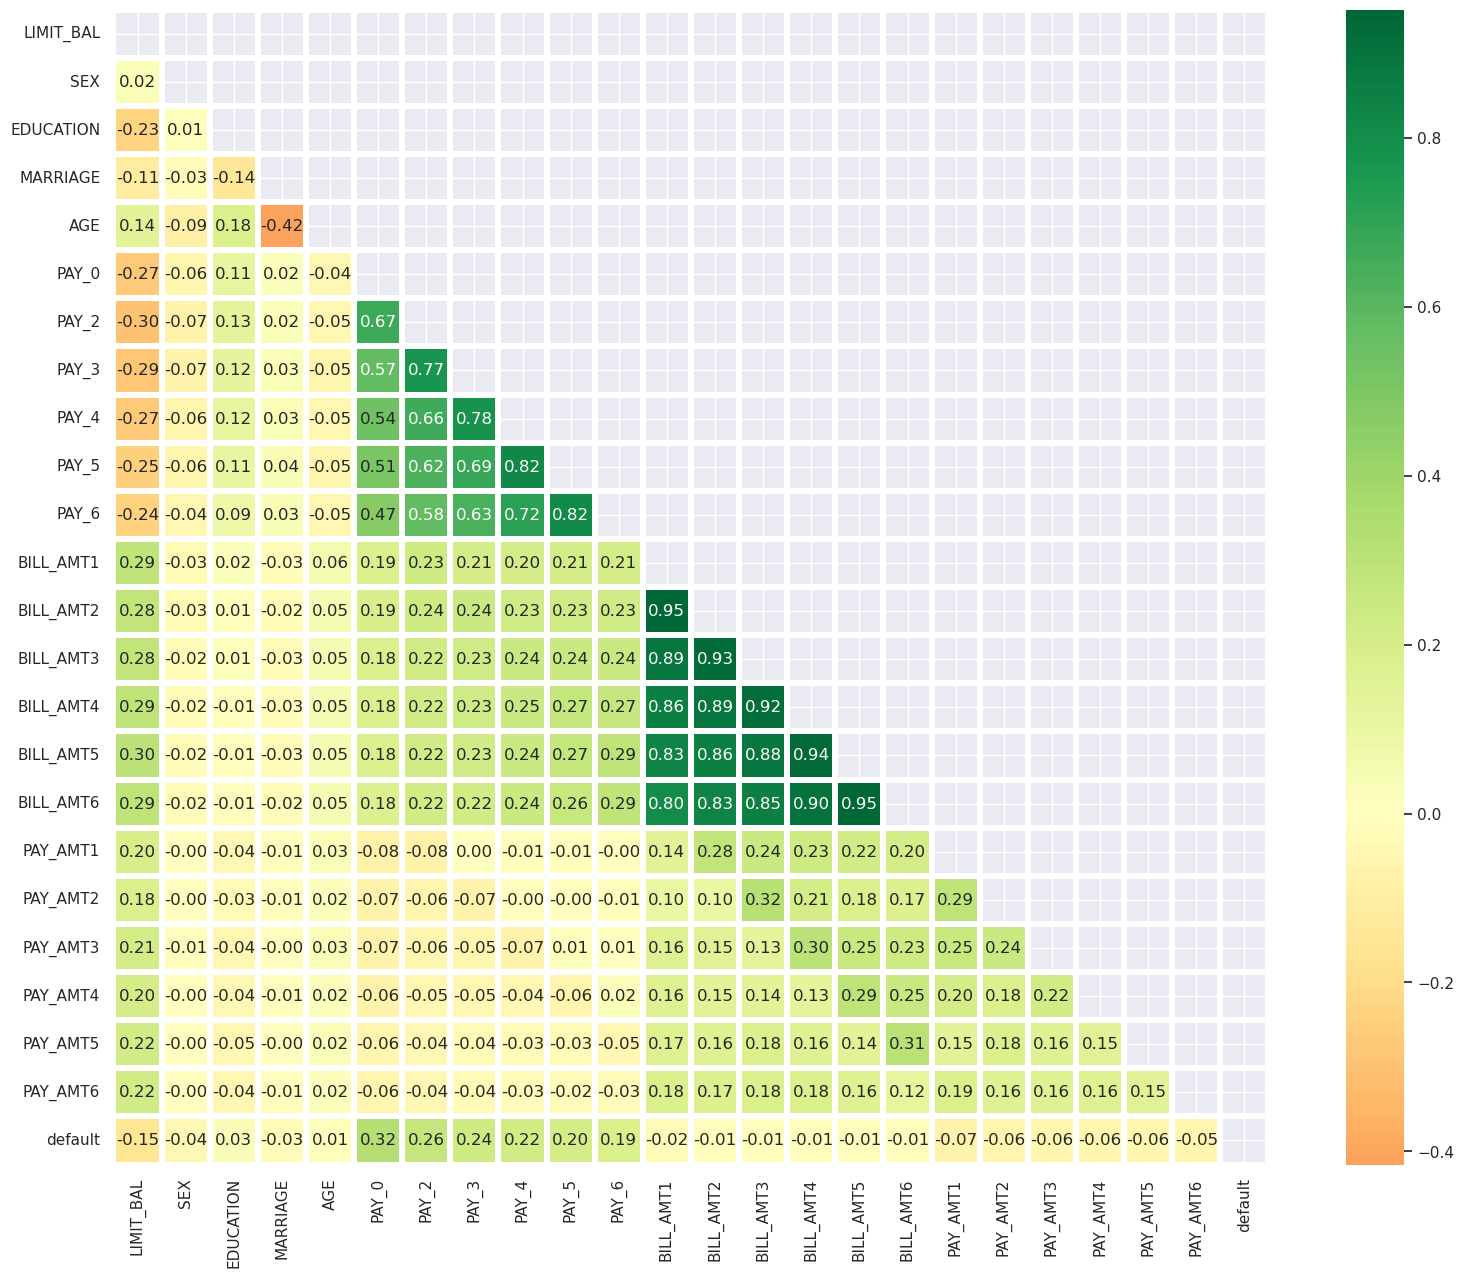

In [49]:
#Correlation on dataset 

plt.figure(figsize=(20,15))
#sns.heatmap(df_cc_copy.corr(), annot=True)

mask = np.zeros_like(df_cc_copy.corr())
mask[np.triu_indices_from(mask)]=True
sns.heatmap(df_cc_copy.corr(), annot=True,center=0,fmt='.2f', square=True, linewidth=3, mask=mask, cmap='RdYlGn')
plt.show()

## Scaling the Data

In [51]:
#Look at the data
df_cc_copy.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2.0,1.0,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2.0,2.0,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2.0,2.0,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2.0,1.0,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2.0,1.0,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [53]:
#List the columns
df_cc_copy.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

## Check Balance of Dependent Variable, Default

default
0    23364
1     6636
Name: count, dtype: int64


<Axes: xlabel='default'>

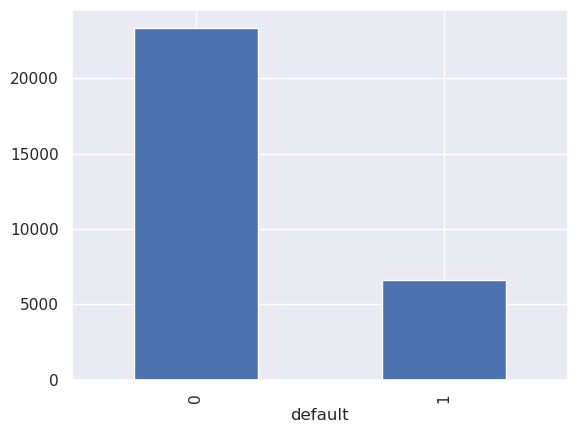

In [55]:
#check default column.  1 = Yes, 0 = No
print(df_cc_copy.default.value_counts())
df_cc_copy.default.value_counts().plot(kind="bar")

<b>Customers that default are one-third of the dataset.  The values for the target, default, are not balanced.</b>

### Address imbalance of Default to non-Default

In [57]:
X = df_cc_copy.drop('default', axis=1)
X

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2.0,1.0,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2.0,2.0,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2.0,2.0,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2.0,1.0,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2.0,1.0,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3.0,1.0,39,0,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,150000,1,3.0,2.0,43,-1,-1,-1,-1,0,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,30000,1,2.0,2.0,37,4,3,2,-1,0,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,80000,1,3.0,1.0,41,1,-1,0,0,0,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [59]:
y= df_cc_copy['default']
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default, Length: 30000, dtype: int64

In [61]:
from imblearn.over_sampling import RandomOverSampler

#Oversampling & fit
ros = RandomOverSampler()
X_res,y_res = ros.fit_resample(X,y)

#Before and after oversampling counts
from collections import Counter
print('Original dataset shape {}'. format(Counter(y)))
print('Resampled dataset shape {}'. format(Counter(y_res)))  

#Graph distribution of y_res
#y_res.value_counts().plot(kind="bar", title=" Rebalanced Default Value Count")
#plt.show()

       

Original dataset shape Counter({0: 23364, 1: 6636})
Resampled dataset shape Counter({1: 23364, 0: 23364})


## Model Building

In [89]:
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold # Feature selector



### Split the data into training and testing data using the train_test_split function

In [160]:
# Scaled down dataset where every value is on the same scale
#X = pd.DataFrame(sc_X.fit_transform(df_cc_copy.drop(['default'], axis=1),),columns=['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
#       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
#      'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
#       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'])
#X.head()

In [65]:

from sklearn.model_selection import train_test_split

# Split the data into training and test sets
# set random_state so that train data will be constant For every run
# test_size = 0.2.  20% of data will be used for testing, 80% for training

X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size = 0.33, random_state = 42)

### Random Forest

<b>Building the model using RandomForest</b>

Classification Report for Random Forest
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      7696
           1       0.89      0.95      0.92      7725

    accuracy                           0.92     15421
   macro avg       0.92      0.92      0.92     15421
weighted avg       0.92      0.92      0.92     15421



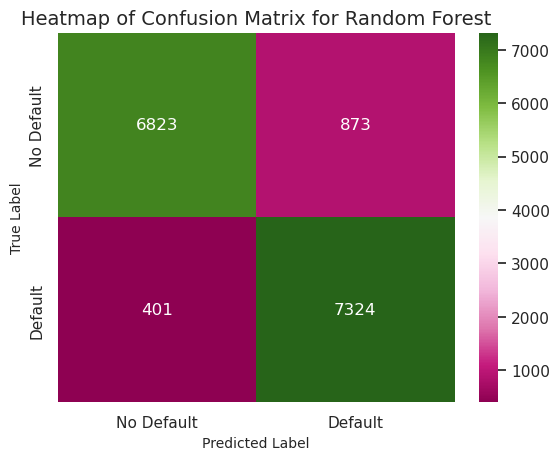

In [91]:
from sklearn.ensemble import RandomForestClassifier



# RandomForestClassifier is a machine learning algorithm that creates a forest of decision trees and 
# combines their predictions to make a final prediction.

#model
rfc_model = Pipeline([('scaler', RobustScaler()),('selector', VarianceThreshold()) ,('forest', RandomForestClassifier(random_state = 42))])


# fit() method trains the model on the input data by adjusting the parameters of the decision trees to
# minimize the error between the predicted and actual values.

rfc_model.fit(X_train, y_train)

# predict
# Use the predict method of a RandomForestClassifier object (rf) to make predictions on a set of test data (X_test).
# The predicted values are then stored in the variable y_pred.

rfc_pred = rfc_model.predict(X_test)

# Check accuracy
#precision:  out of all the YES predications how many were correct?
#recall:  how good was the model at predicting all YES events
#accuracy: out of the predictions made by the model, what percentage is correct?
#f1 score:   F1 score incorporates both precision and recall into a single metric, and a high F1 score is a sign of a well-performing model

from sklearn.metrics import classification_report

print("Classification Report for Random Forest")
print(classification_report(y_test, rfc_pred))

classes = ['No Default', 'Default']
sns.heatmap(confusion_matrix(y_test,rfc_pred), annot=True, fmt="d",cmap="PiYG",xticklabels=classes, yticklabels=classes)

plt.title('Heatmap of Confusion Matrix for Random Forest', fontsize = 14) # title with fontsize 20
plt.xlabel('Predicted Label', fontsize = 10) # x-axis label with fontsize 15
plt.ylabel('True Label', fontsize = 10) # y-axis label with fontsize 15
plt.show()



<b> The accuracy for the Random Forest model is 0.92.  The confusion matrix shows the number of correct and incorrect predictions produced by the model. True label represents the actual values of the data.  Predicted label represents the values predicted by the model.</b>

### Decision Tree

<b> Build model using Decision Tree </b>

Classification Report for Decision Tree
              precision    recall  f1-score   support

           0       0.93      0.77      0.84      7696
           1       0.80      0.95      0.87      7725

    accuracy                           0.86     15421
   macro avg       0.87      0.86      0.85     15421
weighted avg       0.87      0.86      0.85     15421



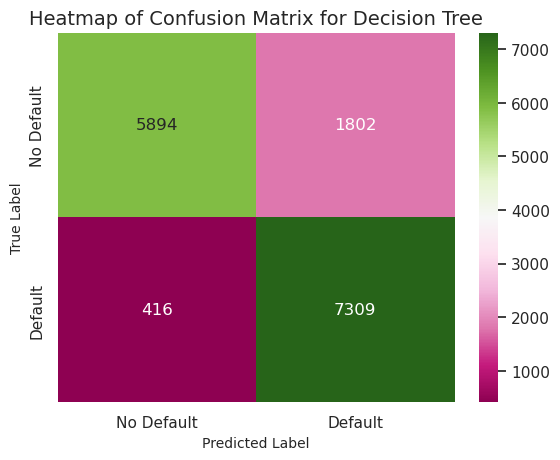

In [93]:
from sklearn.tree import DecisionTreeClassifier
#model
dtree_model = Pipeline([('scaler', RobustScaler()), ('selector', VarianceThreshold()) ,('Decision_Tree', DecisionTreeClassifier(random_state = 42))])

#fit
dtree_model.fit(X_train, y_train)

# predict
dtree_pred = dtree_model.predict(X_test)

# Check accuracy
#precision:  out of all the YES predications how many were correct?
#recall:  how good was the model at predicting all YES events
#accuracy: out of the predictions made by the model, what percentage is correct?
#f1 score:   F1 score incorporates both precision and recall into a single metric, and a high F1 score is a sign of a well-performing model

from sklearn.metrics import classification_report

print("Classification Report for Decision Tree")
print(classification_report(y_test,dtree_pred))

classes = ['No Default', 'Default']
sns.heatmap(confusion_matrix(y_test,dtree_pred), annot=True, fmt="d",cmap="PiYG",xticklabels=classes, yticklabels=classes)


plt.title('Heatmap of Confusion Matrix for Decision Tree', fontsize = 14) # title with fontsize 20
plt.xlabel('Predicted Label', fontsize = 10) # x-axis label with fontsize 15
plt.ylabel('True Label', fontsize = 10) # y-axis label with fontsize 15
plt.show()

<b> The accuracy for the Decision Tree model is 0.86.  The confusion matrix shows the number of correct and incorrect predictions produced by the model. True label represents the actual values of the data.  Predicted label represents the values predicted by the model.</b>

### XgBoost Classifier

<b> Building model using XGBoost</b>

In [55]:
#pip install xgboost

Classification Report for XgBoostClassifier
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      7696
           1       0.81      0.82      0.82      7725

    accuracy                           0.82     15421
   macro avg       0.82      0.82      0.82     15421
weighted avg       0.82      0.82      0.82     15421



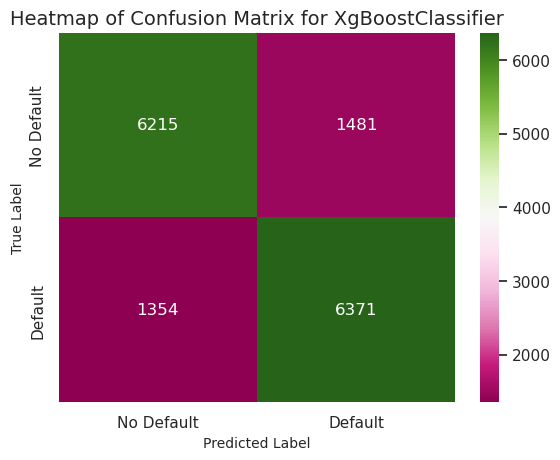

In [95]:
from xgboost import XGBClassifier

#model
xgb_model = Pipeline([('scaler', RobustScaler()), ('selector', VarianceThreshold()), ('Classifier', XGBClassifier(random_state = 42, gamma=0))])

#fit
xgb_model.fit(X_train, y_train)

# predict
xgb_pred = xgb_model.predict(X_test)


# Check accuracy
#precision:  out of all the YES predications how many were correct?
#recall:  how good was the model at predicting all YES events
#accuracy: out of the predictions made by the model, what percentage is correct?
#f1 score:   F1 score incorporates both precision and recall into a single metric, and a high F1 score is a sign of a well-performing model

from sklearn.metrics import classification_report

print("Classification Report for XgBoostClassifier")
print(classification_report(y_test,xgb_pred))

classes = ['No Default', 'Default']
sns.heatmap(confusion_matrix(y_test,xgb_pred), annot=True, fmt="d",cmap="PiYG",xticklabels=classes, yticklabels=classes)


plt.title('Heatmap of Confusion Matrix for XgBoostClassifier', fontsize = 14) # title with fontsize 20
plt.xlabel('Predicted Label', fontsize = 10) # x-axis label with fontsize 15
plt.ylabel('True Label', fontsize = 10) # y-axis label with fontsize 15
plt.show()

<b> The accuracy for the XgBoostClassifier model is 0.82.  The confusion matrix shows the number of correct and incorrect predictions produced by the model. True label represents the actual values of the data.  Predicted label represents the values predicted by the model.</b>

### Suport Vector Machine (SVM)

<b> Building the model using Support Vector Machine (SVM)</b>

Classification Report for Support Vector Machines
              precision    recall  f1-score   support

           0       0.66      0.84      0.74      7696
           1       0.78      0.58      0.66      7725

    accuracy                           0.71     15421
   macro avg       0.72      0.71      0.70     15421
weighted avg       0.72      0.71      0.70     15421



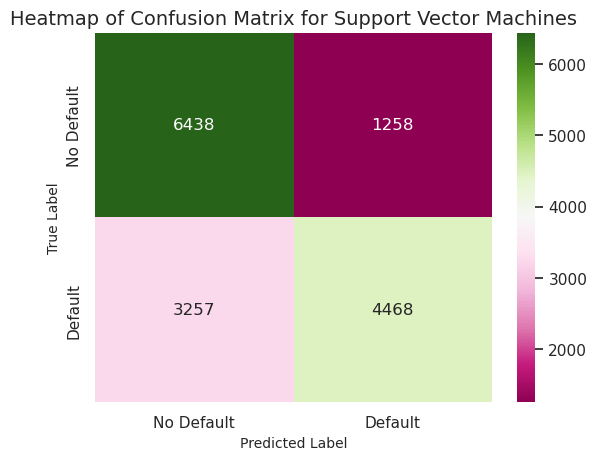

In [97]:
from sklearn.svm import SVC


#model
svm_model = Pipeline([('scaler', RobustScaler()),('selector', VarianceThreshold()), ('svc', SVC(random_state = 42))])

#fit
svm_model.fit(X_train, y_train)

#predict
svm_pred = svm_model.predict(X_test)


# Check accuracy
#precision:  out of all the YES predications how many were correct?
#recall:  how good was the model at predicting all YES events
#accuracy: out of the predictions made by the model, what percentage is correct?
#f1 score:   F1 score incorporates both precision and recall into a single metric, and a high F1 score is a sign of a well-performing model

from sklearn.metrics import classification_report

print("Classification Report for Support Vector Machines")
print(classification_report(y_test,svm_pred))

classes = ['No Default', 'Default']
sns.heatmap(confusion_matrix(y_test,svm_pred), annot=True, fmt="d",cmap="PiYG",xticklabels=classes, yticklabels=classes)

plt.title('Heatmap of Confusion Matrix for Support Vector Machines', fontsize = 14) # title with fontsize 20
plt.xlabel('Predicted Label', fontsize = 10) # x-axis label with fontsize 15
plt.ylabel('True Label', fontsize = 10) # y-axis label with fontsize 15
plt.show()

<b> The accuracy for the Support Vector Machines model is 0.71.  The confusion matrix shows the number of correct and incorrect predictions produced by the model. True label represents the actual values of the data.  Predicted label represents the values predicted by the model.</b>

### Logistic Regression

<b>Building the model using Logistic Regression</b>

Classification Report for Logistic Regression
              precision    recall  f1-score   support

           0       0.66      0.69      0.68      7696
           1       0.68      0.65      0.66      7725

    accuracy                           0.67     15421
   macro avg       0.67      0.67      0.67     15421
weighted avg       0.67      0.67      0.67     15421



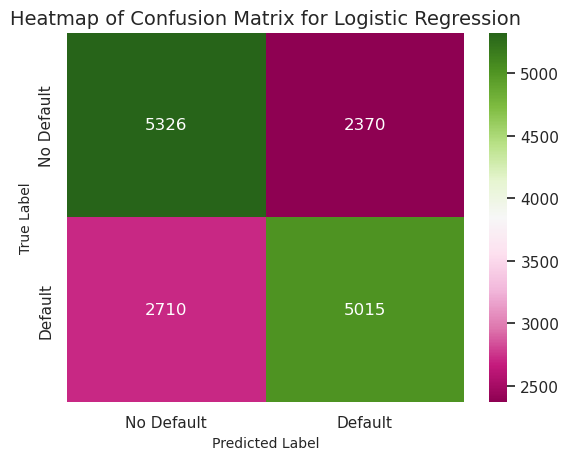

In [101]:
from sklearn.linear_model import LogisticRegression

# model
lg_model = Pipeline([('scaler', RobustScaler()), ('selector', VarianceThreshold()),('lr', LogisticRegression(random_state = 42))])

#fit
lg_model.fit(X_train, y_train)

#predict
lg_pred = lg_model.predict(X_test)

# Check accuracy
#precision:  out of all the YES predications how many were correct?
#recall:  how good was the model at predicting all YES events
#accuracy: out of the predictions made by the model, what percentage is correct?
#f1 score:   F1 score incorporates both precision and recall into a single metric, and a high F1 score is a sign of a well-performing model

from sklearn.metrics import classification_report

print("Classification Report for Logistic Regression")
print(classification_report(y_test,lg_pred))

classes = ['No Default', 'Default']
sns.heatmap(confusion_matrix(y_test,lg_pred), annot=True, fmt="d",cmap="PiYG",xticklabels=classes, yticklabels=classes)

plt.title('Heatmap of Confusion Matrix for Logistic Regression', fontsize = 14) # title with fontsize 20
plt.xlabel('Predicted Label', fontsize = 10) # x-axis label with fontsize 15
plt.ylabel('True Label', fontsize = 10) # y-axis label with fontsize 15
plt.show()

<b> The accuracy for the Logistic Regression model is 0.67.  The confusion matrix shows the number of correct and incorrect predictions produced by the model. True label represents the actual values of the data.  Predicted label represents the values predicted by the model.</b>

## Summarize the Results

In [103]:
Accuracy_Summary = pd.DataFrame({"Accuracy":[metrics.accuracy_score(y_test,rfc_pred),
                              metrics.accuracy_score(y_test,dtree_pred),
                              metrics.accuracy_score(y_test,xgb_pred),
                              metrics.accuracy_score(y_test,svm_pred),
                              metrics.accuracy_score(y_test,lg_pred)]},
                   index = ["Random Forest", "Decision Tree", "XgBoostClassifier", "Support Vector Machines", "Logistic Regression"])
Accuracy_Summary

,Accuracy
Random Forest,0.917385
Decision Tree,0.856170
XgBoostClassifier,0.816160
Support Vector Machines,0.707217
Logistic Regression,0.670579


## Conclusion from Model Building
<b>Random Forest is the best model for this prediction.  It has the best accuracy at 0.92.</b>

## Feature Importance
How much weightage each feature provides in the model building phase.

### Get feature importances - Random Forest Model

In [105]:
from sklearn.inspection import permutation_importance
feature_importances = permutation_importance(
    rfc_model, X_test, y_test, n_repeats=10, random_state=42
)


### Plot feature importances - Random Forest Model

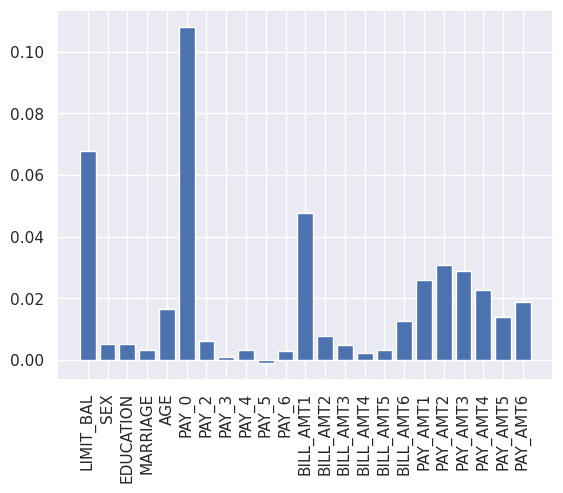

In [106]:
import matplotlib.pyplot as plt

features = X_train.columns
importances = feature_importances.importances_mean

plt.bar(features, importances)
plt.xticks(rotation=90)
plt.show()

<b>The above graph shows Pay_0 (History of past payment, where -1: pay duly, 1: payment delay one month, etc.) is the most importance feature in this dataset.</b>

## Saving Model - Random Forest

In [109]:
import pickle

#Use the dump() function to save the model using pickle
saved_model = pickle.dumps(rfc_model)

#Load the saved model
rfc_from_pickle = pickle.loads(saved_model)

#After loading the model, use the model to make predictions
d = rfc_from_pickle.predict(X_test)


In [348]:
df_cc.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Use Model Saved to Pickle

In [263]:
# Select row with index 4
q = list(df_cc.iloc[4,0:23])
rfc_from_pickle.predict([q])

array([0])

<p> Row with index 4</p>
<b>Default = 0.  Model predicted 0.</b>

In [115]:
df_cc.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,50000,1,2,1,46,0,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [219]:
# Select row with index 29996
q = list(df_cc.iloc[29996,0:23])
rfc_from_pickle.predict([q])

array([0])

<p>row with index 29996</p>
<b>Default = 0.  Model predicted 0.</b>

In [314]:
# Select row with index 29999
q = list(df_cc.iloc[29999,0:23])
rfc_from_pickle.predict([q])

array([1])

<p>row with index 29999</p>
<b>Default = 1. Model predicted 1.</b>

### Save Model to a File

In [265]:
pickle.dump(rfc_model, open('cc_rfc_model.pkl', 'wb'))

### Load Model from a File and use for a prediction

In [267]:
pickled_model = pickle.load(open('cc_rfc_model.pkl', 'rb'))
# row with index 29999
q = list(df_cc.iloc[29999,0:23])
rfc_from_pickle.predict([q])

array([1])

## Save cleaned credit card dataframe to a file

In [316]:
df_cc_copy.to_csv('creditcardml_cleaned.csv',index=False)